# Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y

## Table of contents

1. Import Libraries
2. Load Data
3. Data Analysis
4. Data Preprocessing
5. Train Model
    - Generate poly features
    - Train model
6. Test Model on `x_test`
7. Calculate R2 Score
8. Test Model on custom data
9. Get Model Parameters

## 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

## 2) Load Data

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## 3) Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


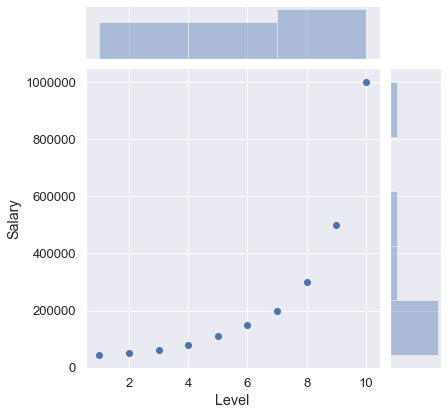

In [5]:
sns.jointplot(x='Level', y='Salary', data=df)

## 4) Data Preprocessing

In [6]:
x = df['Level'].values.reshape(-1, 1)
y = df['Salary']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 5) Train Model

### 5.1) Generate poly features

In [8]:
poly = PolynomialFeatures(degree=4)

In [9]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [10]:
x_train

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]], dtype=int64)

In [11]:
x_train_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

### 5.2) Train model

In [12]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

## 6) Test Model on `x_test`

In [13]:
y_pred = model.predict(x_test_poly)
y_pred

array([550738.27849056,  30679.16278174, 139190.58942538])

In [14]:
y_test

8    500000
1     50000
5    150000
Name: Salary, dtype: int64

## 7) Calculate R2 Score

In [15]:
model.score(x_train_poly, y_train)

0.9996794412192239

In [16]:
model.score(x_test_poly, y_test)

0.9725566178032462

## 8) Test Model on custom data

In [17]:
model.predict(poly.fit_transform([[11]]))

array([1749247.42698585])

## 9) Get Model Parameters

In [18]:
model.coef_

array([      0.        , -168317.83314078,   77119.19581313,
        -12789.6636695 ,     761.1082316 ])

In [19]:
model.intercept_

148977.62346120848

In [20]:
pd.DataFrame(model.coef_, poly.get_feature_names(), columns=["Coeff"])

,Coeff
1,0.000000
x0,-168317.833141
x0^2,77119.195813
x0^3,-12789.663669
x0^4,761.108232


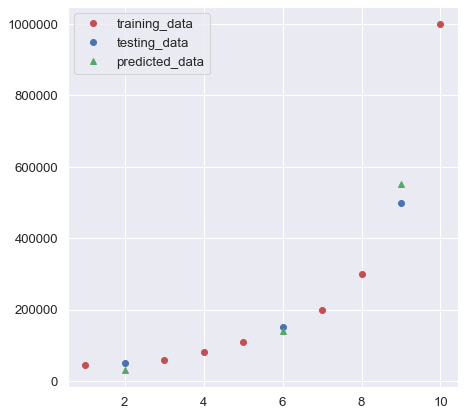

In [21]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g^', label='predicted_data')
plt.legend()

# Great Work!